In [114]:
# Import libraries 
import nltk
import requests
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from lxml.html.clean import Cleaner
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.tokenize import sent_tokenize
from collections import defaultdict
from heapq import nlargest

In [115]:
# Define URL 
url = 'https://www.washingtonpost.com/news/the-switch/wp/2016/05/02/hulu-may-soon-offer-live-tv-including-sports/'

In [116]:
# download the web page 
webpage = requests.get(url)

In [ ]:
# Create a web page of downloaded page using lxml parser
my_soup = BeautifulSoup(webpage.text, "lxml")

In [117]:
# find element on specific class and extract the text out of it.
article_titel = my_soup.find(class_='moat-trackable pb-f-theme-normal pb-f-dehydrate-false pb-f-async-false full pb-feature pb-layout-item pb-f-article-article-topper')
article_title_text = article_titel.text
article_title_text

'   The Switch   Hulu may soon offer live TV, including sports       '

In [119]:
# Remove the <a href tags from the Soup
for link in my_soup.find_all('a'): 
    link.decompose()

# find_all the <p> elements from the soup and extract the text of those elements and combine them into one string and 
# convert it into lowercase.
article_contents_text = ' '.join(map(lambda p: p.text, my_soup.find_all('p')))
article_contents_text = article_contents_text.lower()
article_contents_text

'hulu\'s take on the skinny tv bundle may be coming soon to a screen near you. according to a , the online streaming service is looking into offering live-streaming content from a handful of cable channels as part of a\xa0service that could cost about $40 per month. hulu is owned by fox, disney and nbcuniversal; the journal report said that fox and disney are close to closing deals to offer their channels through the service. that would give subscribers access to abc, the disney channel and espn as well as fox news and "national and regional sports channels," the report said. the new service could launch in the first quarter of 2017 and would also include a digital dvr service, the journal said. the new york times reported the service  as hulu makes its annual pitch to advertisers.\xa0hulu could not\xa0immediately be reached for comment. for consumers, hulu\'s reported move would offer yet another choice in the streaming world. according to a december survey from the , 1 in 7 americans

In [120]:
# Create the list of stop words and punctuation
list_of_punctuation =  list(punctuation)
english_stops = set(stopwords.words('english') + list_of_punctuation)

In [51]:
# tokenize the contents of article , it will generate list and check its length
tokenized_words_article_contents_text = word_tokenize(article_contents_text)
print(len(tokenized_words_article_contents_text))

579


In [52]:
# Lets clean the tokens by removing stop words , punctuation and text with lengh on 1
cleaned_tokenized_words_article_contents_generator = (word for word in tokenized_words_article_contents_text if word not in english_stops and len(word) > 1 )

In [53]:
# convert generator into list
x = 0
cleaned_tokenized_words_article_contents_list = list()
for word in cleaned_tokenized_words_article_contents_generator:
    x = x + 1
    cleaned_tokenized_words_article_contents_list.append(word)
print(x)

301


In [54]:
# check the frequency of words from cleaned tokanized text of article contents
Freq_dist_dict = nltk.FreqDist(cleaned_tokenized_words_article_contents_list)

In [55]:
Freq_dist_dict

FreqDist({'hulu': 10, 'service': 10, 'offer': 7, 'content': 6, 'channels': 6, 'fox': 5, 'disney': 5, 'said': 5, "'s": 4, 'cable': 4, ...})

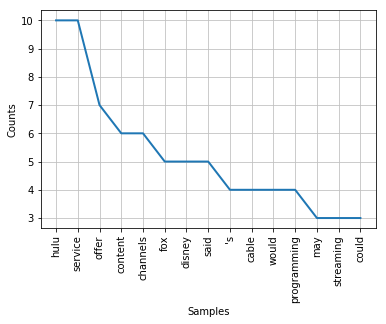

In [46]:
Freq_dist_dict.plot(15, cumulative=False)

In [56]:
for key,value in Freq_dist_dict.items():
    print(key, "=", value)

hulu = 10
's = 4
take = 1
skinny = 1
tv = 2
bundle = 1
may = 3
coming = 1
soon = 1
screen = 1
near = 1
according = 2
online = 1
streaming = 3
service = 10
looking = 1
offering = 1
live-streaming = 1
content = 6
handful = 1
cable = 4
channels = 6
part = 1
could = 3
cost = 1
40 = 1
per = 1
month = 3
owned = 1
fox = 5
disney = 5
nbcuniversal = 1
journal = 2
report = 3
said = 5
close = 2
closing = 1
deals = 3
offer = 7
would = 4
give = 1
subscribers = 1
access = 1
abc = 1
channel = 1
espn = 1
well = 1
news = 1
`` = 2
national = 1
regional = 1
sports = 2
'' = 2
new = 3
launch = 1
first = 1
quarter = 1
2017 = 1
also = 2
include = 1
digital = 1
dvr = 1
york = 1
times = 1
reported = 2
makes = 1
annual = 1
pitch = 1
advertisers = 1
immediately = 1
reached = 1
comment = 1
consumers = 3
move = 1
yet = 1
another = 1
choice = 1
world = 1
december = 1
survey = 1
americans = 3
canceled = 1
satellite = 2
subscription = 3
done = 1
around = 1
suggests = 1
rate = 1
cut = 1
cord = 1
growing = 1
fact = 1
f

In [58]:
# lets convert artcile contents into sentences.
sents = sent_tokenize(article_contents_text)
sents

["hulu's take on the skinny tv bundle may be coming soon to a screen near you.",
 'according to a , the online streaming service is looking into offering live-streaming content from a handful of cable channels as part of a\xa0service that could cost about $40 per month.',
 'hulu is owned by fox, disney and nbcuniversal; the journal report said that fox and disney are close to closing deals to offer their channels through the service.',
 'that would give subscribers access to abc, the disney channel and espn as well as fox news and "national and regional sports channels," the report said.',
 'the new service could launch in the first quarter of 2017 and would also include a digital dvr service, the journal said.',
 'the new york times reported the service  as hulu makes its annual pitch to advertisers.',
 'hulu could not\xa0immediately be reached for comment.',
 "for consumers, hulu's reported move would offer yet another choice in the streaming world.",
 'according to a december survey

In [86]:
# now further tokenize sentences list into words tokens 
word_sent = [word_tokenize(s.lower()) for s in sents]

In [87]:
# assign a number to every tokens of every sentence list
marked_list_of_sentences = list(enumerate(word_sent))

In [88]:
for number,sentence in marked_list_of_sentences:
    print(number , sentence)

0 ['hulu', "'s", 'take', 'on', 'the', 'skinny', 'tv', 'bundle', 'may', 'be', 'coming', 'soon', 'to', 'a', 'screen', 'near', 'you', '.']
1 ['according', 'to', 'a', ',', 'the', 'online', 'streaming', 'service', 'is', 'looking', 'into', 'offering', 'live-streaming', 'content', 'from', 'a', 'handful', 'of', 'cable', 'channels', 'as', 'part', 'of', 'a', 'service', 'that', 'could', 'cost', 'about', '$', '40', 'per', 'month', '.']
2 ['hulu', 'is', 'owned', 'by', 'fox', ',', 'disney', 'and', 'nbcuniversal', ';', 'the', 'journal', 'report', 'said', 'that', 'fox', 'and', 'disney', 'are', 'close', 'to', 'closing', 'deals', 'to', 'offer', 'their', 'channels', 'through', 'the', 'service', '.']
3 ['that', 'would', 'give', 'subscribers', 'access', 'to', 'abc', ',', 'the', 'disney', 'channel', 'and', 'espn', 'as', 'well', 'as', 'fox', 'news', 'and', '``', 'national', 'and', 'regional', 'sports', 'channels', ',', "''", 'the', 'report', 'said', '.']
4 ['the', 'new', 'service', 'could', 'launch', 'in', '

In [121]:
# intialike ranking where we will store rank/marks for every line . and default value of this will be zero.
ranking = defaultdict(int)
ranking


defaultdict(int, {})

In [122]:
# lets calculate the importance of every line and store it in ranking
for number, sent in marked_list_of_sentences:
    for word in sent:
        if word in list(Freq_dist_dict.keys()):
            ranking[number] += Freq_dist_dict[word]
print(ranking)


defaultdict(<class 'int'>, {0: 26, 1: 56, 2: 71, 3: 44, 4: 46, 5: 31, 6: 16, 7: 38, 8: 17, 9: 17, 10: 24, 11: 3, 12: 22, 13: 39, 14: 24, 15: 7, 16: 58, 17: 29, 18: 19, 19: 23, 20: 16, 21: 21, 22: 27, 23: 44, 24: 33, 25: 46})


In [125]:
# pick the 3 most important lines.
sents_idx = nlargest(3,ranking, key = ranking.get)
sents_idx

[2, 16, 1]

In [128]:
# print the 3 most important Lines .
for linenumber in sents_idx:
    print(sents[linenumber])
    print("____________________")

hulu is owned by fox, disney and nbcuniversal; the journal report said that fox and disney are close to closing deals to offer their channels through the service.
____________________
given its expected price, the hulu package would be a competitor for other services that offer a mix of on-demand and live content such as sony's $30-per-month playstation vue and dish's $20-per-month sling tv.
____________________
according to a , the online streaming service is looking into offering live-streaming content from a handful of cable channels as part of a service that could cost about $40 per month.
____________________
